In [28]:
# the division in python always returns the float value but not the integer
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import accuracy_score
from scipy.special import logit
# Generate synthetic data
N = 100
# Zeros form a Gaussian centered at (-1, -1)
# epsilon is .1
x_zeros = np.ones((50,2))
x_zeros = np.random.multivariate_normal(mean=np.array((-1.0, -1.0)), cov=.1*np.eye(2), size=(50,))
y_zeros = np.zeros((50,))
# Ones form a Gaussian centered at (1, 1)
# epsilon is .1
x_ones = np.random.multivariate_normal(mean=np.array((1.0, 1.0)), cov=.1*np.eye(2), size=(50,))
y_ones = np.ones((50,))

x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

The important takeaway in the above code is that the division operator always gives the float datatype as the output, and it does not do the conversion automatically. So all the N/2 have been replaced as the 50

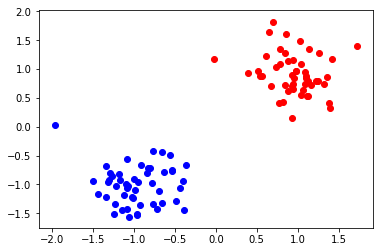

In [29]:
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")
plt.show()

This is the first achievement so far. and please look into the syntax of the scatter and the plot commands in the matplot lib # peace

In [38]:
# Generate tensorflow graph
with tf.name_scope("placeholders"):
  # Note that our datapoints x are 2-dimensional.
  x = tf.placeholder(tf.float32, (N, 2))
  y = tf.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((2, 1)))
  b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope("prediction"):
  y_logit = tf.squeeze(tf.matmul(x, W) + b)
  # the sigmoid gives the class probability of 1
  y_one_prob = tf.sigmoid(y_logit)
  # Rounding P(y=1) will give the correct prediction.
  y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):
  # Compute the cross-entropy term for each datapoint
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
  # Sum all contributions
  l = tf.reduce_sum(entropy)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.01).minimize(l)
with tf.name_scope("summaries"):
  loss_scalar=tf.summary.scalar("loss", l)
  merged = tf.summary.merge([loss_scalar])

  train_writer = tf.summary.FileWriter("logistic-train", tf.get_default_graph())

In [37]:
n_steps = 1000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Train model
  for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
    print("loss: %f" % loss)
    train_writer.add_summary(summary, i)
  y_pred_np = sess.run(y_pred, feed_dict=feed_dict)
  print(y_pred_np)
  w_final, b_final = sess.run([W, b])

loss: 113.592430
loss: 112.291336
loss: 110.995667
loss: 109.705612
loss: 108.421356
loss: 107.143082
loss: 105.870987
loss: 104.605270
loss: 103.346115
loss: 102.093712
loss: 100.848267
loss: 99.609978
loss: 98.379021
loss: 97.155602
loss: 95.939911
loss: 94.732117
loss: 93.532425
loss: 92.341011
loss: 91.158066
loss: 89.983757
loss: 88.818268
loss: 87.661743
loss: 86.514381
loss: 85.376335
loss: 84.247765
loss: 83.128815
loss: 82.019638
loss: 80.920380
loss: 79.831161
loss: 78.752136
loss: 77.683434
loss: 76.625153
loss: 75.577408
loss: 74.540329
loss: 73.514000
loss: 72.498520
loss: 71.493973
loss: 70.500450
loss: 69.518021
loss: 68.546753
loss: 67.586708
loss: 66.637939
loss: 65.700493
loss: 64.774422
loss: 63.859749
loss: 62.956501
loss: 62.064705
loss: 61.184372
loss: 60.315517
loss: 59.458126
loss: 58.612206
loss: 57.777740
loss: 56.954712
loss: 56.143105
loss: 55.342873
loss: 54.553993
loss: 53.776413
loss: 53.010098
loss: 52.254990
loss: 51.511036
loss: 50.778164
loss: 50.0563

In [32]:
score = accuracy_score(y_np, y_pred_np)
print("Classification Accuracy: %f" % score)

Classification Accuracy: 1.000000


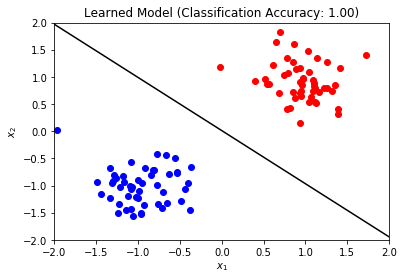

In [33]:
# Save image of the data distribution
plt.xlabel("$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy: 1.00)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)
plt.plot([x_left, x_right], [y_left, y_right], color='k')

plt.savefig("logistic_pred.png")
